# Project 3 Collaborative Filtering

## Question 1:
Compute the sparsity of the movie rating dataset, where sparsity is defined by the following equation:
$$Sparsity = \frac{Total number of available ratings}{Total number of possible ratings}$$

In [2]:
# import data
import numpy as np
import csv
def loadCSVfile(name):
    try:
        tmp = np.loadtxt(name, dtype = np.str, delimiter = ",")
        data = tmp[1:,0:].astype(np.str) #加载数据部分
        label = tmp[0,0:].astype(np.str) #加载类别标签部分
    except ValueError:
        with open(name,"r",encoding = "UTF-8") as f:
            content = csv.reader(f)
            li = []
            i = 0
            for row in content:
                if i == 0:
                    label = np.array(row)
                else:
                    li.append(np.array(row))
                i += 1
            data = np.array(li)
    return data, label #返回array类型的数据

ratings, rate_label = loadCSVfile('ratings.csv')
tags, tag_label = loadCSVfile('tags.csv')
links, link_label = loadCSVfile('links.csv')
movies, movie_label = loadCSVfile('movies.csv')

In [3]:
print('-'*20,'ratings','-'*20)
print("The labels are:",rate_label)
print("How much is the data:",ratings.shape)
print('-'*20,'tags','-'*20)
print("The labels are:",tag_label)
print("How much is the data:",tags.shape)
print('-'*20,'links','-'*20)
print("The labels are:",link_label)
print("How much is the data:",links.shape)
print('-'*20,'movies','-'*20)
print("The labels are:",movie_label)
print("How much is the data:",movies.shape)

-------------------- ratings --------------------
The labels are: ['userId' 'movieId' 'rating' 'timestamp']
How much is the data: (100836, 4)
-------------------- tags --------------------
The labels are: ['userId' 'movieId' 'tag' 'timestamp']
How much is the data: (3683, 4)
-------------------- links --------------------
The labels are: ['movieId' 'imdbId' 'tmdbId']
How much is the data: (9742, 3)
-------------------- movies --------------------
The labels are: ['movieId' 'title' 'genres']
How much is the data: (9742, 3)


In [4]:
def sparsity(data):
    rate = 0
    total = len(data)
    for i in data:
        if i.startswith("0"):
            pass
        else:
            rate+=1
    return float(rate)/float(total)

sparsity(ratings[:,2])

0.9864135824507121

## Question 2:
Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram.

In [5]:
from collections import Counter
rating_span = np.arange(0.5,5.5,0.5)
rating_counter = Counter(ratings[:,2])
rating_counter2 = [rating_counter[str(i)] for i in rating_span]
rating_count = np.array([rating_span,rating_counter])
rating_counter

Counter({'0.5': 1370,
         '1.0': 2811,
         '1.5': 1791,
         '2.0': 7551,
         '2.5': 5550,
         '3.0': 20047,
         '3.5': 13136,
         '4.0': 26818,
         '4.5': 8551,
         '5.0': 13211})

Text(0.5,1,'Frequency of rating values')

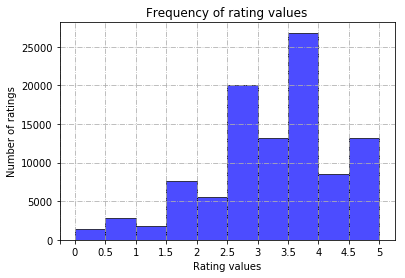

In [6]:
# plot the histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(rating_span, rating_counter2, 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks((0,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25),(u'',u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating values')
plt.ylabel('Number of ratings')
plt.title('Frequency of rating values')

## Question 3:
Plot the distribution of the number of ratings received among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y-axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected.

In [7]:
movie_rate = Counter(ratings[:,1])
movie_rate_dec = sorted(movie_rate.items(),key = lambda item: item[1],
                 reverse = True)
movie_y = [i[1] for i in movie_rate_dec]
movie_x = [i[0] for i in movie_rate_dec]

Text(0.5,1,'Distribution of the number of ratings received among movies')

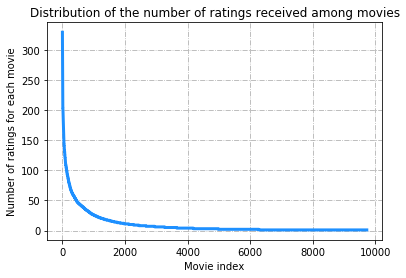

In [8]:
length = len(movie_y)
plt.plot(range(1,length+1),movie_y,color='dodgerblue',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('Movie index')
plt.ylabel('Number of ratings for each movie')
plt.title('Distribution of the number of ratings received among movies')

## Question 4:
Plot the distribution of ratings among users. To be specific, the X-axis should be the user index ordered by decreasing frequency and the Y-axis should be the number of movies the user have rated. The requirement of the plot is similar to that in Question 3.

In [9]:
user_rate = Counter(ratings[:,0])
user_rate_dec = sorted(user_rate.items(),key = lambda item: item[1],
                      reverse = True)
user_y = [i[1] for i in user_rate_dec]
user_x = [i[0] for i in user_rate_dec]

Text(0.5,1,'Distribution of ratings among users')

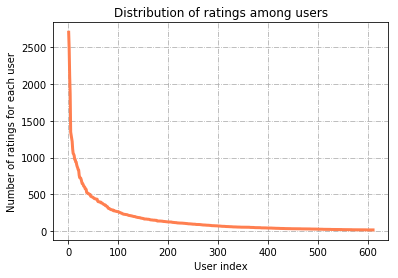

In [10]:
length = len(user_y)
plt.plot(range(1,length+1),user_y,color='coral',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('User index')
plt.ylabel('Number of ratings for each user')
plt.title('Distribution of ratings among users')

## Question 5:
Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.

#### There are so many movies but the number of ratings are nothing comparing to that of movies. And there are so many movies that only one or two ratings are received. 

## Question 6:
Compute the variance of the rating values received by each movie. Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram. 

In [11]:
# Calculate the variance of ratings for each movie
def get_var(data):
    length = data.shape[0]
    d = {}
    d_key = set(data[:,0])
    for i in d_key:
        li = []
        for j in range(length):
            if i == data[j,0]:
                li.append(float(data[j,1]))
        d_var = np.var(li)
        d[i] = d_var
    return d

rating_var_dict = get_var(ratings[:,1:3])

In [12]:
# Compute the number of movies in each variance interval
import math
def get_interval(var_dict):
    max_value = max(var_dict.values())
    interval = np.arange(0,float(float(math.ceil(max_value*2))/2+0.5),0.5)
    length = len(interval)
    counter = {}
    for i in interval[:-1]:
        counter[i] = 0
    for item in var_dict.items():
        for i in range(length-1):
            if item[1]>=interval[i] and item[1]<interval[i+1]:
                counter[interval[i]]+=1
    return counter, interval

rating_var_count,interval = get_interval(rating_var_dict)
print('The number of ratings to each interval of variance:')
rating_var_count

The number of ratings to each interval of variance:


{0.0: 5996,
 0.5: 2313,
 1.0: 990,
 1.5: 265,
 2.0: 100,
 2.5: 22,
 3.0: 27,
 3.5: 4,
 4.0: 4,
 4.5: 1,
 5.0: 2}

Text(0.5,1,'Variance of the rating values rerceived by each movie')

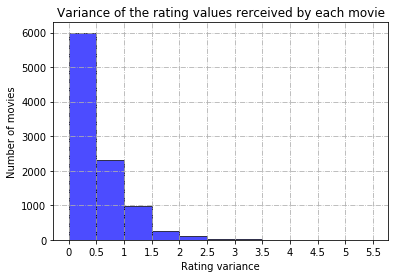

In [13]:
# show time
plt.bar(rating_var_count.keys(), rating_var_count.values(), 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks(interval-0.25,(u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5',u'5.5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating variance')
plt.ylabel('Number of movies')
plt.title('Variance of the rating values rerceived by each movie')

## Question 7:
Write down the formula for $\mu_u$ in terms of $I_u$ and $r_{uk}$

$$\mu_u = \frac{\sum_{k = I_u[0]}^{I_u[-1]} r_{uk}}{len(I_u)}$$ 

## Question 8:
In plain words, explain the meaning of $I_u \bigcap I_v$ . Can $I_u \bigcap I_v = \phi$ (Hint: Rating matrix R is sparse).

## Question 9:
Can you explain the reason behind mean-centering the raw ratings $(r_{uj}-\mu_v)$ in the prediction function? (Hint: Consider users who either rate all items highly or rate all items poorly and the impact of these users on the prediction function)

## Question 10:
Design a k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [14]:
# define rating matrix
movie_num = len(set(movies[:,0]))
user_num = len(set(ratings[:,0]))
movie_id = movies[:,0]
user_id = list(set(ratings[:,0]))
user_id.sort(key=list(ratings[:,0]).index)
R_matrix = np.zeros([user_num,movie_num])

# put ratings into the R_matrix
total = len(ratings[:,0])
i,j = 0,0
for k in range(total):
    tag = 0
    while (i < user_num):
        if (j == movie_num):
            i += 1
            j = 0
        else:
            pass
        while (j < movie_num and i < user_num):
            if (user_id[i] == ratings[k,0] and movie_id[j] == ratings[k,1]):
                R_matrix[i][j] = float(ratings[k,2])
                tag = 1
                break
            else:
                j += 1
        if (tag):
            break
        else:
            pass
R_matrix

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [15]:
# construct k-NN filter
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
import os

file_path = os.path.expanduser('ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
 
sim = {'name':'pearson','user_based':True}
knn = KNNWithMeans(k=2, min_k=1, sim_options=sim, verbose=True)
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0242  1.0302  1.0260  1.0167  1

{'fit_time': (1.6344237327575684,
  1.6988708972930908,
  1.7874996662139893,
  1.7281510829925537,
  1.759369134902954,
  1.6662938594818115,
  1.694767951965332,
  1.7256569862365723,
  1.6708691120147705,
  1.6465187072753906),
 'test_mae': array([0.79148626, 0.79596649, 0.79332647, 0.7834524 , 0.77426144,
        0.77541234, 0.79339443, 0.77798818, 0.78537931, 0.77858541]),
 'test_rmse': array([1.02417782, 1.03015117, 1.02599311, 1.01668911, 1.00397358,
        1.00413073, 1.02770551, 1.00759628, 1.01721878, 1.00304159]),
 'test_time': (0.8343803882598877,
  0.8476290702819824,
  0.8837502002716064,
  0.9181985855102539,
  0.8967292308807373,
  0.9137964248657227,
  0.8219048976898193,
  0.8765237331390381,
  0.8756062984466553,
  0.8985252380371094)}

In [16]:
# try k-NN filter on different k
mae = []
rmse = []
sim = {'name':'pearson','user_based':True}
for k in range(2,102,2):
    knn = KNNWithMeans(k=k, min_k=1, sim_options=sim, verbose=True)
    result_dict = cross_validate(knn, data, measures=['RMSE', 'MAE'], 
                                 cv=10, verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0118  1.0079  1.0171  1.0138  1

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8948  0.8966  0.8894  0.9011  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8888  0.8909  0.8898  0.8710  0

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8860  0.8854  0.8980  0.8961  0.8893  0.8796  0.8920  0.8853  0.8871  0.90

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8779  0.8923  0.8971  0.8850  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8854  0.8979  0.8740  0.8911  0

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8875  0.8779  0.8928  0.8952  0.8927  0.8935  0.8782  0.8963  0.8824  0.88

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8877  0.8815  0.8883  0.8855  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8887  0.8918  0.8813  0.8908  0

Text(0.5,1,'MAE against k')

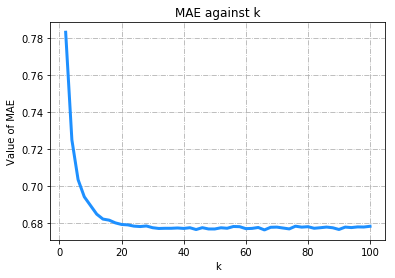

In [17]:
# plot 
x = range(2,102,2)
# MAE
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of MAE')
plt.title('MAE against k')

Text(0.5,1,'RMSE against k')

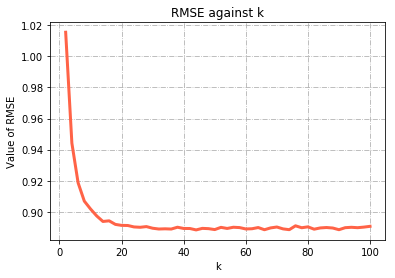

In [18]:
# RMSE
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k')

## Question 11:
Use the plot from question 10, to find a 'minimum k'. Note: The term 'minimum k' in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then 'minimum k' would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE.

The steady state values of MAE is: 0.683257956536476


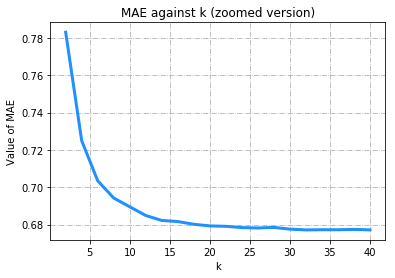

In [19]:
#  zoom MAE
plt.plot(x[:20],mae[:20],color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of MAE')
plt.title('MAE against k (zoomed version)')
print('The steady state values of MAE is:',np.mean(mae[:-10]))

The steady state of RMSE is: 0.8960893680190407


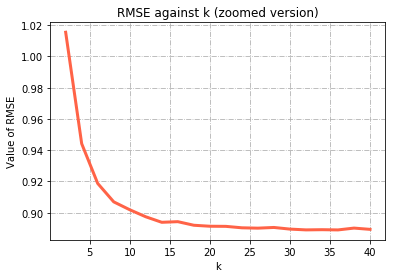

In [20]:
# zoom RMSE
plt.plot(x[:20],rmse[:20],color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (zoomed version)')
print('The steady state of RMSE is:',np.mean(rmse[:-10]))

#### The min stable state is when k = 20

## Question 12+13+14:
Design a k-NN collaborative filter to predict the ratings of the movies in the \[popular movie trimmed, unpopular movie trimmed, high variance movie trimmed\] test set and evaluate it's performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.

### Popular movie trimming

In [69]:
# Define a function for Popular movie trimming

#testset_sort = sorted(testset,key=lambda x:int(x[1]))
#count_sort = sorted(Counter([x[1] for x in testset_sort]).items(),
 #                   key=lambda item:int(item[1]))
def PMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] > 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

# test PMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
PMT(a)

[('0', '1', 4), ('0', '1', 3), ('2', '1', 2)]

In [71]:
# train the dataset using Popular movie trimming
from surprise.model_selection import KFold
from surprise import accuracy

# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
sim = {'name':'pearson','user_based':True}
rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options=sim,verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        knn.fit(trainset)
        testset_trim = PMT(testset)
        predictions = knn.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0089
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0240
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0008
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0277
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0329
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0291
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0061
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0152
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0249
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0135
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9153
Computing 

Done computing similarity matrix.
RMSE: 0.8617
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8585
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8496
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8560
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8652
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8638
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8607
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8529
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8592
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8696
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8630
Computing the pearson similarity matrix...
Done compu

RMSE: 0.8604
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8340
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8515
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8513
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8670
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8659
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8656
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8466
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8647
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8695
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8612
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.85

Done computing similarity matrix.
RMSE: 0.8549
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8652
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8565
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8486
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8510
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8525
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8607
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8490
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8571
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8530
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8514
Computing the pearson similarity matrix...
Done compu

RMSE: 0.8618
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8613
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8552
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8730
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8558
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8549
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8675
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8486
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8589
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8498
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8708
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.85

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8507
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8566
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8608
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8733
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8340
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8596
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8595
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8605
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8605
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8545
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8741
Computing 

The steady state values of RMSE is: 0.8655853152011185


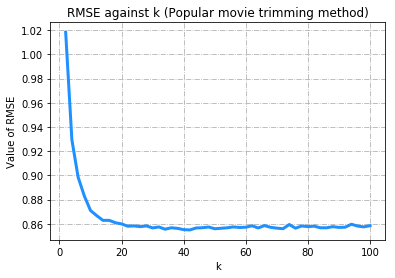

In [72]:
# show time (plot)
x = range(2,102,2)

plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Popular movie trimming method)')
print('The steady state values of RMSE is:',np.mean(rmse[:-10]))

### Unpopular movie trimming

In [74]:
# define a function for Unpopular movie trimming
def UMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] <= 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

# test PMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
UMT(a)

[('2', '2', 2), ('2', '3', 5), ('6', '3', 5)]

In [75]:
# train the dataset using unpopular movie trimming
kf = KFold(n_splits=10)

# Construct a knn filter
sim = {'name':'pearson','user_based':True}
rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options=sim,verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        knn.fit(trainset)
        testset_trim = UMT(testset)
        predictions = knn.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0093
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9821
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0060
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0326
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0410
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0056
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0381
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0062
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0352
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0050
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9663
Computing 

Done computing similarity matrix.
RMSE: 0.9541
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9434
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9638
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9745
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9917
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9403
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9682
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9527
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9355
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9880
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9586
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9396
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9767
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9375
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9562
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9272
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9581
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9733
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9563
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9617
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9518
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9348
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.96

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9548
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9440
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9582
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9335
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9680
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9591
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9588
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9550
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9603
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9463
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9648
Computing 

Done computing similarity matrix.
RMSE: 0.9661
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9776
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9485
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9413
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9581
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9630
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9488
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9389
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9675
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9677
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9549
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9629
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9434
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9403
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9487
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9592
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9396
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9842
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9573
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9534
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9465
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9570
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.95

The steady state values of RMSE is: 0.9595626035033223


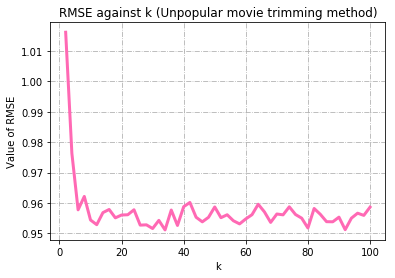

In [77]:
# show time (plot)
x = range(2,102,2)

plt.plot(x,rmse,color='hotpink',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Unpopular movie trimming method)')
print('The steady state values of RMSE is:',np.mean(rmse[:-30]))

### High variance movie trimming

In [89]:
# Define a function for high variance movie trimming method
def HVMT(testset):
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter1 = list(filter(lambda x:x[1] >= 5,counter))
    var_list = list(get_var(np.array(testset)[:,1:3]).items())
    count_filter2 = list(filter(lambda x:x[1] >= 2,var_list))
    count_filter = list(set([x[0] for x in count_filter1]).intersection(set([y[0] for y in count_filter2])))
    #count_filter = list([x[0] for x in count_filter1 if x[0] in [y[0] for y in count_filter2]])
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5),
    ('0','1',100),('0','1',20),('5','3',5),('6','3',5)]
HVMT(a)

[('0', '1', 4), ('0', '1', 3), ('2', '1', 2), ('0', '1', 100), ('0', '1', 20)]

In [93]:
# train the dataset using high variance movie trimming method
kf = KFold(n_splits=10)

# Construct a knn filter
sim = {'name':'pearson','user_based':True}
rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options=sim,verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        knn.fit(trainset)
        testset_trim = HVMT(testset)
        predictions = knn.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0346
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0344
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0237
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1033
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9130
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8920
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0994
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9238
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9175
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0459
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8843
Computing 

RMSE: 0.8725
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7055
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8835
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9426
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7331
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8295
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7769
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7909
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8174
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8528
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8814
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.73

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7507
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6772
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7847
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6225
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8269
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8187
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9037
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8044
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7450
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9134
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6691
Computing 

Done computing similarity matrix.
RMSE: 0.8071
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8894
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7646
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8459
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6297
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8137
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7624
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7457
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6667
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7281
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7091
Computing the pearson similarity matrix...
Done compu

RMSE: 0.8600
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7804
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7874
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7498
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8964
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6724
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7445
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8735
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7664
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7579
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9175
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.78

Done computing similarity matrix.
RMSE: 0.7118
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8320
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6556
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8925
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7313
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7063
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8466
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8715
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7543
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7343
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8131
Computing the pearson similarity matrix...
Done compu

The steady state values of RMSE is: 0.8132205948705732


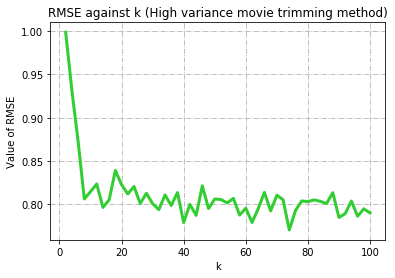

In [94]:
# show time (plot)
x = range(2,102,2)

plt.plot(x,rmse,color='limegreen',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (High variance movie trimming method)')
print('The steady state values of RMSE is:',np.mean(rmse[:-10]))

## Question 15:
Plot the ROC curves for the k-NN collaborative filter designed in question 10 for threshold values \[2.5, 3, 3.5, 4\]. For the ROC plotting use the k found inn question 11. For each of the plots, also report the area under the curve (AUC) value.

In [ ]:
# define plot drawing
from sklearn import metrics

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, linewidth=2,label= 'area under curve = %0.4f' % roc_auc)
    #color='coral'
    
    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
        
# prepare plot for svm_hard

score_hard = svm_hard.decision_function(X_test_lsi)
#print(len(score_hard))
fpr_hard,tpr_hard,_ = metrics.roc_curve(test_label, score_hard, pos_label=1)

# draw the ROC for svm_hard

plot_roc(fpr_hard, tpr_hard)

In [ ]:
# Define a func to get ground_truth
def get_groundTruth(dataset,threshold):
    new_data = []
    for tup in dataset:
        r = 1 if float(tup[2]) >= threshold else 0
        new_data.append((tup[0],tup[1],r))
    return new_data

# Train the binary dataset
threshold = [2.5,3,3.5,4]
sim = {'name':'pearson','user_based':True}
knn = KNNWithMeans(k=20, min_k=1, sim_options=sim, verbose=True)
kf = KFold(n_splits=10)
trainset,testset = kf.split(data)
bin_train = get_groundTruth(trainset,threshold[0])
bin_testset = get_groundTruth(testset,threshold[0])
knn.fit(bin_train)
fpr,tpr,_ = roc_curve()